# Kickstarter Projects
https://www.kaggle.com/kemical/kickstarter-projects

## KickStarterとは  
いわゆるクラウドファンディングのプラットフォームを提供するwebサイト。  
クリエイターと呼ばれる人やチームがプロジェクトを実行するために必要な資金を募る。  
クリエイターに投資(プレッジ)をする人をバッカーと呼び、プロジェクトが成立したあかつきには報酬が貰える。  
Kickstarterのファンディングはall-or-nothing方式なので、プレッジ金額がファンディングゴールに達するまでは、集まった資金が回収されることはない。  
(Kickstarter公式ヘルプ参考)  
## 本分析の目標  
クラウドファンディングの成否を事前の情報だけを使って予測する。  
day1では特に線形手法であるロジスティック回帰を使う。
## 使用するデータ  
kaggleには[ks-projects-201612.csv]と[ks-projects-201801.csv]が含まれている。基本的なデータは同様だが、複数ある通貨の集計値が異なっている。後者にのみ今回使いたいファンディングゴールの集計値が含まれているので、基本的にはこちらを使用する。

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support

In [129]:
# データの確認
df = pd.read_csv("raw_data/ks-projects-201801.csv")
df['ID'] = df['ID'].astype(str)  # IDは文字型としての統計を見たいので型変換
display(df.head())
display(df.describe(include='all'))
print(df.isnull().sum())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,378661,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,214281476,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,1,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


### 所感  
1.目標はクラウドファンディングの成否を事前に予測することなので、成否が決まった後のデータ「pledged,backers,usd pledged,usd_pledged_real」は使用しない。  currency,countryも支援者に関する情報なので基本的には使えない。  
2.launchedには1970年というあり得ない値が含まれている。実質的な欠損値なので注意する。  
3.直観的に成否に直結しそうな要素は目標金額、募集期間、カテゴリー。  
4.分析が難しいがプロジェクト名も重要な要因だろう。同名のプロジェクトが複数含めれているのも気になる。リピート回数も成否を分ける要因かもしれない。  
5.目的変数であるstateには成否以外に4つの状態が含まれている。これらを成否どちらかに含めるか、あるいは捨てるかを検討する必要あり。

### 目的変数stateの調査

In [130]:
print(df["state"].value_counts())
# 成功率は40%くらい

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [133]:
# 各state毎のデータを表示する
for s in ["canceled","undefined","live","suspended"]:
    print(s)
    display(df.where(df["state"]==s).dropna(subset=["state"]).head()) 

canceled


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14.0,US,1283.00,1283.00,19500.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58.0,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43.0,US,6240.57,6240.57,65000.00
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6.0,CA,553.32,535.09,11466.14
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15.0,US,2030.00,2030.00,87000.00


undefined


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0.0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0.0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0.0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0.0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0.0,"N,0""",NaN,3660.38,3000.00


live


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.0,live,24.0,CA,185.65,472.88,2396.36
183,1000761521,KILOS.,Thrillers,Film & Video,USD,2018-02-06,5000.0,2017-12-23 20:34:31,310.0,live,4.0,US,200.00,310.00,5000.00
458,1002183790,The Man in the Field,Horror,Film & Video,GBP,2018-01-08,850.0,2017-12-21 11:19:18,413.0,live,11.0,GB,13.39,563.32,1159.38
537,1002599057,Dear Atlantas,Film & Video,Film & Video,USD,2018-02-16,2000.0,2017-12-18 02:48:27,5.0,live,1.0,US,5.00,5.00,2000.00
544,1002629894,Art Calendar 2018,Illustration,Art,MXN,2018-01-06,1000.0,2017-12-21 05:34:12,0.0,live,0.0,MX,0.00,0.00,52.32


suspended


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
374,1001732009,DotPen : Redefines drawing and writing for sma...,Product Design,Design,USD,2014-08-09,25000.0,2014-06-30 21:17:10,39693.0,suspended,647.0,US,39693.00,39693.0,25000.00
688,1003367610,Aleppo - Make Soap Not War,Crafts,Crafts,DKK,2017-07-13,55000.0,2017-06-19 08:34:15,20320.0,suspended,60.0,DK,3059.73,3119.1,8442.45
689,1003378025,Hackchain - The World's First Wearable Wifi Ja...,Wearables,Technology,USD,2017-11-10,30000.0,2017-10-11 03:53:25,994.0,suspended,15.0,US,557.00,994.0,30000.00
1047,100524873,PRESIDENT OF THE UNITED STATES (Suspended),Academic,Publishing,USD,2015-10-25,5500.0,2015-08-26 05:54:42,0.0,suspended,0.0,US,0.00,0.0,5500.00
1114,1005618996,Masters of the Tooniverse Podcast (Suspended),Webseries,Film & Video,USD,2013-07-02,3200.0,2013-05-30 19:24:22,3226.0,suspended,24.0,US,3226.00,3226.0,3200.00


canceled … クリエイターがプロジェクトを中止した状態  
undefined … バッカーの情報が無いデータ  
live … 継続中のプロジェクト(deadlineがcsv作成日よりも後)  
suspended　… クリエイターがKickstarterのルールを守らないと公式から中断処置を受けるらしい  
  
pledgeがgoalを上回っているプロジェクトもあるが、明確に成否と判断するのは難しく、データも多くないので今回は分析対象から除外する。

In [142]:
# 成否決定後のデータと成否以外の状態を落とす
df = pd.read_csv("raw_data/ks-projects-201801.csv")
df = df.drop(["ID","currency","pledged","goal","backers","usd pledged","usd_pledged_real","country"],axis=1)
df = df.query("state == 'successful' or state =='failed'")
df.head()

,name,category,main_category,deadline,launched,state,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,5000.00
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,50000.00


### 日時情報の加工  
deadline,launchedはstr型なので加工して必要なデータを取り出す。  
①募集期間(launchedからdeadlineまでの日数)→当然長い方が成功しやすいと期待  
②2009/4/28(kickstarterの設立日)を起点としたlauncedの日数→kickstarter自体が有名になる方が成功しやすいと期待

In [161]:
df["from_foundation"] = (pd.to_datetime(df["deadline"])-dt(2009,4,28)).astype('timedelta64[D]')
df["period"] = (pd.to_datetime(df["deadline"])-pd.to_datetime(df["launched"])).astype('timedelta64[D]')+1
display(df.describe())
df.head()

,usd_goal_real,from_foundation,period
count,3.316750e+05,331675.000000,331675.000000
mean,4.151000e+04,1986.979718,33.954902
std,1.108930e+06,701.200100,12.713329
min,1.000000e-02,5.000000,1.000000
25%,2.000000e+03,1464.000000,30.000000
50%,5.000000e+03,2051.000000,30.000000
75%,1.500000e+04,2538.000000,36.000000
max,1.663614e+08,3171.000000,92.000000


,name,category,main_category,deadline,launched,state,usd_goal_real,from_foundation,period
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,1533.95,2355.0,59.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,30000.00,3109.0,60.0
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,45000.00,1400.0,45.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,5000.00,1084.0,30.0
5,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,50000.00,2530.0,35.0


### 最低限のデータは揃ったのでロジスティック回帰で学習してみる

In [ ]:
# とりあえず3種の数値データを使って予測してみる
X = df[["usd_goal_real","period","from_foundation"]].values
y = df["state"].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol = None)
clf.fit(X, y)

/Users/tsubasa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [9]:
y_est = clf.predict(X)
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

正答率 = 60.966%


### データ可視化

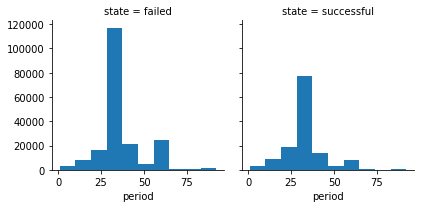

In [11]:
# 募集期間による成否の変化
g = sns.FacetGrid(df, col='state')
g.map(plt.hist, 'period', bins=10)

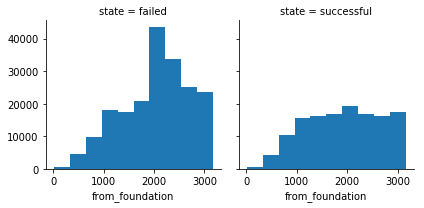

In [12]:
# Kickstarter設立からの日数による成否の変化
g = sns.FacetGrid(df, col='state')
g.map(plt.hist, 'from_foundation', bins=10)

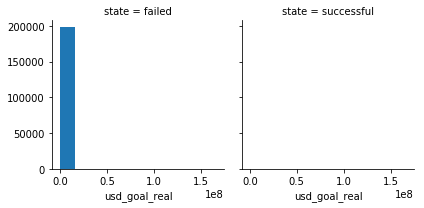

In [19]:
# ファンディングゴールによる成否の変化
g = sns.FacetGrid(df, col='state')
g.map(plt.hist, 'usd_goal_real', bins=10)

まともにグラフが描けない…↑で見たようにusd_goal_realの最大値は1e8のオーダーなので、  
そのデータに引っ張られて詳細なデータが描けていない。

In [58]:
for i in (1e4,1e5,1e6,1e7,1e8):
    print("ゴールが{:.1e}USD以上のデータ数={}".format(i, len(df.query("usd_goal_real >= @i"))))

ゴールが1.0e+04USD以上のデータ数=122881
ゴールが1.0e+05USD以上のデータ数=12540
ゴールが1.0e+06USD以上のデータ数=1072
ゴールが1.0e+07USD以上のデータ数=146
ゴールが1.0e+08USD以上のデータ数=24


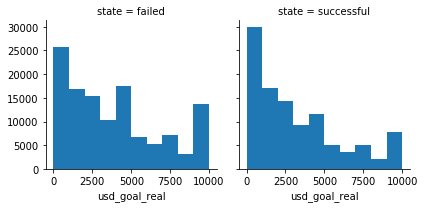

In [63]:
# ゴールが1e4以下のデータでグラフを再描画
df_tmp = df.query("usd_goal_real <= 1e4")
g = sns.FacetGrid(df_tmp, col='state')
g.map(plt.hist, 'usd_goal_real', bins=10)

### 可視化をした上での所感 
・募集期間はキリがいい30日が多い。以前は90日まで設定可能だったらしいが、短い方が成功しやすいということで現在では60日までしか設定できない。  
実際に30日以内の方が成功率が高いように見える。  
https://www.kickstarter.com/blog/shortening-the-maximum-project-length  
・設立6年目くらいが爆発的にプロジェクトの数が多く、成功率が低い。その他の期間は軒並み一定の成功率か。   
6年目を起点にした日数を特徴量にしても良いが、線形回帰では少々難しいか。  
・ファンディングゴールは切りの良い金額のプロジェクトが多い。やはり目標が低いほど成功率が高い傾向がある。  

→期間と目標だけを説明変数として学習をしてみる

In [162]:
X = df[["usd_goal_real","period"]].values
y = df["state"].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol = None)
clf.fit(X, y)

/Users/tsubasa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [163]:
y_est = clf.predict(X)
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

正答率 = 61.393%


In [168]:
# 混同行列と各種評価指標
conf_mat = pd.DataFrame(confusion_matrix(y, y_est,labels=["successful","failed"]), 
                        index=['正解 = successful', '正解 = failed'], 
                        columns=['予測 = successful', '予測 = failed'])
display(conf_mat)

precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est,labels=["successful","failed"])
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

,予測 = successful,予測 = failed
正解 = successful,33124,100832
正解 = failed,27219,170500


適合率（Precision） = 54.893%
再現率（Recall） = 24.728%
F1値（F1-score） = 34.096%


Recallがすこぶる悪い。何らかの原因で失敗予測をする方にモデルが偏っている様子。

In [154]:
# 重み表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = 2942.859, w1 = -1.092, w2 = -55.794


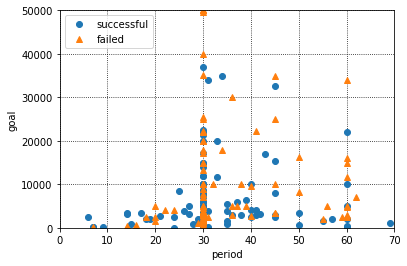

In [153]:
# 目標と期間を軸にして成否をプロット
plt.grid(which='major',color='black',linestyle=':')
df_tmp = df.query("state == 'successful'"). sample(100)
x1 = df_tmp["period"]
x2 = df_tmp["usd_goal_real"]
plt.plot(x1, x2, 'o', color='C0', label='successful')

df_tmp = df.query("state == 'failed'"). sample(100)
x1 = df_tmp["period"]
x2 = df_tmp["usd_goal_real"]
plt.plot(x1, x2, '^', color='C1', label='failed')

plt.xlim([0,70])
plt.ylim([0,5e4])
plt.legend(loc='best')

plt.xlabel("period")
plt.ylabel("goal")
plt.show()

目標と期間だけではとてもじゃないが分類し切れるとは思えない…

### カテゴリーの影響調査

In [78]:
# 扱いやすいように成功=1,失敗=0とする
df["state"] = df["state"].replace("successful",1).replace("failed",0)

In [90]:
# main_category毎の成功確率
df_tmp = df[["main_category", "state"]].groupby(['main_category'], as_index=False).mean().sort_values(by='state', ascending=False)
df_tmp["count"] = df[["main_category", "state"]].groupby(['main_category'], as_index=False).count()["state"]
df_tmp

,main_category,state,count
3,Dance,0.654352,3573
14,Theater,0.637961,10242
1,Comics,0.591415,9878
10,Music,0.526606,45949
0,Art,0.448890,25641
8,Games,0.438905,28521
6,Film & Video,0.417906,56527
4,Design,0.415944,25364
12,Publishing,0.347017,35445
11,Photography,0.341108,9689


In [102]:
# category毎の成功確率
df_tmp = df[["category", "state"]].groupby(['category'], as_index=False).mean().sort_values(by='state', ascending=False)
df_tmp["count"] = df[["category", "state"]].groupby(['category'], as_index=False).count()["state"]
display(df_tmp.head())
display(df_tmp.tail())

,category,state,count
21,Chiptune,0.818182,33
122,Residencies,0.735294,68
6,Anthologies,0.706920,737
36,Dance,0.695221,2218
83,Literary Spaces,0.684211,19


,category,state,count
59,Food Trucks,0.137865,1574
146,Video,0.132468,385
88,Mobile Games,0.106029,1443
151,Web,0.102808,4309
8,Apps,0.071496,5287


カテゴリーによる成功率の違いは歴然。絶対にモデルに組み込むべき。  
ただ数値データではないので線形モデルには組み込みにくいか。one-hot形式にしてみるか。

In [117]:
df2 = df.drop(["name","category","deadline","launched","from_foundation"],axis =1)
for i in df2["main_category"].unique():
    df2[i] = 0
    df2.loc[df['main_category'] == i, i] = 1
df2.head()

,main_category,state,usd_goal_real,period,Publishing,Film & Video,Music,Food,Crafts,Games,Design,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism
0,Publishing,0,1533.95,59.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Film & Video,0,30000.00,60.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Film & Video,0,45000.00,45.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Music,0,5000.00,30.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Food,1,50000.00,35.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# カテゴリー情報を加えて再学習
X = df2.drop(["main_category","state"],axis=1).values
y = df2["state"].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol = None)
clf.fit(X, y)

/Users/tsubasa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
y_est = clf.predict(X)
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

正答率 = 62.537%


あまり変わらない。特徴抽出が悪いのか、ロジスティック回帰の限界なのか…